# ABC-анализ (моющие средства)

Проведем анализ моющих средств (порошков)

Принцип ABC-аналиа заключается в оценке вклада каждой позиции (или товарной группы) в "общий котел", 
затем сортируем по %% этого вклада (так, чтобы товары с наибольшим вкладом были вверху). 

Затем считаем накопительным итогом %% и делим на группы: 

- все позиции, которые накопительными итогом дают 80% попадают в группу "А"; 
- от 81% до 95% попадают в группу "B"; 
- остальные 5% попадают в группу "C".

Устанавливаем библиотеки

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px

Pагрузка данных

In [13]:
df = pd.read_csv('abc.csv', sep=';', decimal=',')

Посмотрим типы столбцов

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     18 non-null     object 
 1   revenue  18 non-null     float64
 2   amount   18 non-null     float64
 3   profit   18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 708.0+ bytes


Посмотрим датафрейм

In [15]:
df

,name,revenue,amount,profit
0,ARIEL,5344.86,43.0,0.21
1,BIMAX,11030.81,86.0,0.25
2,DOSIA,7587.34,91.0,0.25
3,TIDE,5626.73,48.0,0.23
4,АИСТ,1763.27,40.0,0.30
5,АИСТЕНОК,647.17,12.0,0.26
6,ДЕНИ,781.90,18.0,0.26
7,ЛОСК,6455.48,58.0,0.18
8,МИФ,14162.25,135.0,0.23
9,ПЕРСИЛ,4208.71,34.0,0.21


Описание столбцов

 - name - наименование
 - revenue - выручка
 - amount - кол-во проданных штук
 - profit - процент маржинальности (%)

## Одномерный ABC-анализ

Проводим по следующему алгоритму:

1. Выбираем характеристику для анализа
2. Считаем относительный вклад каждой позиции в общий «котел»
3. Сортируем по убыванию величины вклада
4. Находим накопительный итог вклада
5. Разбиваем на группы A (накопительный итог до 80%), Б (накопительный итог до 95%) и С (накопительный итог до 100%)

Для анализа будем использовать колонку "amount - кол-во проданных штук"

In [23]:
index = 'name'
col = 'amount'

# создаим новый датафрейм
groupped_df = df.copy()

# Считаем и делим для каждой группы товаров % от суммы
groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col]) 

# затем сортируем наши порошки по полученным выше значениям (самые большие значения сначала)
groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)

# считаем накопительный итог с помощью .cumsum
groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()

# Присваиваем группы в зависимости от значений в колонке  "сumsum_amount"
groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))

# Смотрим что получилось
groupped_df

,name,revenue,amount,profit,rel_amount,cumsum_amount,abc_amount
8,МИФ,14162.25,135.0,0.23,0.169598,0.169598,A
2,DOSIA,7587.34,91.0,0.25,0.114322,0.283920,A
1,BIMAX,11030.81,86.0,0.25,0.108040,0.391960,A
10,УШАСТЫЙ НЯНЬ,14305.22,76.0,0.23,0.095477,0.487437,A
13,ПЕМОС,4836.57,69.0,0.25,0.086683,0.574121,A
7,ЛОСК,6455.48,58.0,0.18,0.072864,0.646985,A
3,TIDE,5626.73,48.0,0.23,0.060302,0.707286,A
0,ARIEL,5344.86,43.0,0.21,0.054020,0.761307,A
4,АИСТ,1763.27,40.0,0.30,0.050251,0.811558,B
9,ПЕРСИЛ,4208.71,34.0,0.21,0.042714,0.854271,B


Недостатки одномерного ABC-анализа в том, что в данном случае мы ориентируемся только на кол-во продаж, игнорируя маржинальность, сумму продаж

## Многомерный ABC-анализ

Делаем тоже самое, только по всем 3 характеристикам - количество, сумма продаж, % доходности

In [32]:
index = 'name'
# создаим переменную куда положим список столбцов
cols = list(df.columns)

# удалим 'name' 
# (удалять приходится, потому что name не числовое поле -  как альтернатива, в cols указывать конкретные столбцы )
cols.remove(index)

# Циклом пробегаемся по всем столбцам
for col in cols:
    groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
    groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
    groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
    groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
groupped_df[cols + [f'abc_{col}' for col in cols]]

,revenue,amount,profit,abc_revenue,abc_amount,abc_profit
4,1763.27,40.0,0.30,C,B,A
5,647.17,12.0,0.26,C,C,A
6,781.90,18.0,0.26,C,C,A
1,11030.81,86.0,0.25,A,A,A
13,4836.57,69.0,0.25,B,A,A
15,1221.46,14.0,0.25,C,C,A
2,7587.34,91.0,0.25,A,A,A
12,5628.30,19.0,0.24,A,B,A
8,14162.25,135.0,0.23,A,A,A
10,14305.22,76.0,0.23,A,A,A


Посмотрим на колонки в groupped_df

In [34]:
groupped_df.columns

Index(['name', 'revenue', 'amount', 'profit', 'rel_amount', 'cumsum_amount',
       'abc_amount', 'rel_revenue', 'cumsum_revenue', 'abc_revenue',
       'rel_profit', 'cumsum_profit', 'abc_profit', 'final_group'],
      dtype='object')

Выберем нужные для нас

In [37]:
groupped_df [['name', 'revenue', 'amount', 'profit', 'abc_amount', 'abc_revenue', 'abc_profit', 'final_group']]

,name,revenue,amount,profit,abc_amount,abc_revenue,abc_profit,final_group
4,АИСТ,1763.27,40.0,0.30,B,C,A,CBA
5,АИСТЕНОК,647.17,12.0,0.26,C,C,A,CCA
6,ДЕНИ,781.90,18.0,0.26,C,C,A,CCA
1,BIMAX,11030.81,86.0,0.25,A,A,A,AAA
13,ПЕМОС,4836.57,69.0,0.25,A,B,A,BAA
15,САРМА,1221.46,14.0,0.25,C,C,A,CCA
2,DOSIA,7587.34,91.0,0.25,A,A,A,AAA
12,СПАРК ДРАМ,5628.30,19.0,0.24,B,A,A,ABA
8,МИФ,14162.25,135.0,0.23,A,A,A,AAA
10,УШАСТЫЙ НЯНЬ,14305.22,76.0,0.23,A,A,A,AAA


## Проводим анализ групп

In [39]:
# Формируем итоговые наборы групп, собрав А-Б-С в одну колонку (для группировки)
groupped_df['final_group'] = groupped_df['abc_revenue'] + groupped_df['abc_amount'] + groupped_df['abc_profit']

# Группируем по созданной колонке final_group
groups = groupped_df.groupby('final_group')['final_group'].agg({'count'}).reset_index()

# Считем проценты от общего кол-ва для каждой группы
groups['perc'] = groups['count'] / sum(groups['count'])

Смотрим что получилось

In [20]:
groups

,final_group,count,perc
0,AAA,5,0.277778
1,AAB,1,0.055556
2,ABA,1,0.055556
3,ABB,1,0.055556
4,BAA,1,0.055556
5,BAB,1,0.055556
6,BBA,1,0.055556
7,BCC,1,0.055556
8,CBA,1,0.055556
9,CBB,1,0.055556


In [ ]:
Создадим диаграмму treemap

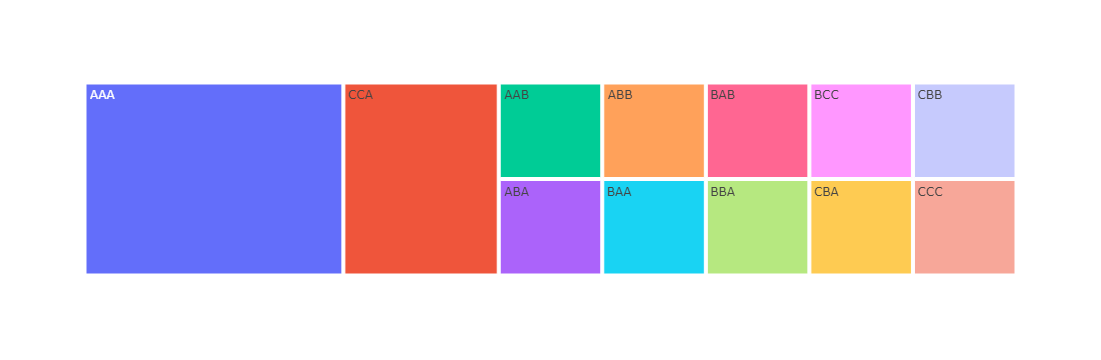

In [21]:
fig = px.treemap(groups, path=['final_group'], values='perc')
fig.show()

# Бизнес-выводы

Рекомендации по группам

1. **Группа AAA** - посмотреть XYZ, чтобы принять решение о поднятии цены

*   Если группа X - можно поднимать (тестово!) цену на короткий период, чтобы увеличить маржинальность. Тестим в течение небольшого срока, чтобы оценить динамику продаж.
*   Если группа Y/Z, лучше не увеличивать цену, потому что сложно будет оценить влияние. Лучше понять, почему спрос нестабильный. И либо поднять цену, но аккуратно + спланировать эксперимент на более длинный срок, либо не повышать цену (если, например, покупают только по акции).

2. **Группа ССA** - оценить объективность причин + часть вывести из ассортимента (их много) + попробовать перевести в группу повыше по количеству (а может и по выручке за счет этого)

* Объективность причин - не отсутствовал товар, есть ли он на полке, нормально ли его видно, не просроченный ли он.
* Подтянуть в группу B по количеству можно за счет акции 1+1 или 2+1 даже. Т.к. товар дешевый, его покупают экономичные люди. А значит можно увеличить средний чек и количество продаж за счет такой акции, стимулируя покупать больше.
* Аистенок, Дени и Сарма примерно с одинаковыми показателями, при этом там нет каких-то нишевых товаров - скорее всего это покупают условные бабушки, которым все равно. А значит можно сократить до 2 товаров.

3. **Группа AAB** - нужно просто найти более выгодную цену поставки, чтобы стать AAA. Либо попробовать немного подтянуть цену, если это группа X по XYZ-анализу.

4. **Группа ABA** - судя по всему, какой-то нишевый порошок СПАРК ДРАМ. Нужно увеличить количество продаж, не упав в прибыли. Можно попробовать постепенно:

* Поставить на более видное место + выделить какими-то ценниками или промо-оформлением
* Сделать акцию формата 1+1
* Сделать акцию скидка при покупке от N штук
* Сделать акцию через кросс-сейл, например, при покупке кондиционера скидка 10% на порошок СПАРК ДРАМ (главное не уронить доходность, оставить в группе А)

5. **Группа ABB**. BIO Mio - нишевая линейка, приносит средний доход и продается в среднем количестве. Это очень хорошо для нишевых продуктов. Можно попробовать подтянуть какой-то один показатель - и лучше пусть это будет количество. Люди привыкнут к продукту, а потом можно будет поднять цену и подтянуть доходность. Соответственно - выставляем на видное место, сочно оформляем, делаем акцию на их продукцию. Для сохранения доходности можно попросить поставщика дать скидку на время акции.

6. **Группа BAA**. Попрошок Пемос - продается много, хорошая доходность, но просто за счет низкой цены маленькая выручка. Цену поднимать довольно опасно, увеличивать сильно количество продаж - бессмысленно (т.к. дешевый сегмент). Можно просто оставить как есть.

7. **Группа BAB**. Ariel - довольно дорогой бренд. По количеству в группе А, но средняя доходность и средняя выручка. Если он в группе X/Y по цене, стоит попробовать поднять цену и подтянуть выручку и прибыль.

8. **Группа BBA**. Persil - аналог Ariel, та же история. Но у него нормальная доходность, при этом не очень много продаж. Стоит подтянуть количество продаж. Как вариант - посмотреть расположение на полках Ariel и Persil. Ariel в группе А по количеству - может быть его поставить повыше, а Persil на уровне глаз, чтобы стимулировать продажи. А Ariel, если его покупают много, потому что любят, сильно в количестве не упадет.

9. **Группа BCC**. Линейка Meine Liebe - еще одна нишевая линейка. Но в отличие от BIO MIO, она продается мало и с плохой доходностью. Поднимать цену нельзя - и так мало продается. Акцию не сделаешь - и так доходность маленькая.

* Ищем другого поставщика или сбиваем цену у текущего, чтобы увеличить прибыль.
* Нужно увеличить продажи и привить любовь к бренду - расставляем по магазину для кросс-сейла (например, можно поставить порошок для шерсти около пледов), ставим на кассу. Можно выдавать пробники - работает отлично. Визуально выделяем линейку, чтобы выглядело сочно.
* Делаем акцию - при покупки Meine Liebe скидка N% на какую-то высокомаржинальную смежную штуку (например, средство для посуды). За счет этого повышаем продажи, но не роняем маржинальность самого товара.
* Фиксируем срок эксперимента (в зависимости от проходимости - несколько недель или несколько месяцев). Если не помогает - выводим и пробуем другую линейку.

10. **Группа CBA**. Порошок АИСТ - та же история, что с группой CCA, только продается чаще. За счет вывода из ассортимента 1-2 товаров из группы CCA может вырасти его кол-во покупок и он станет CAA.

11. **Группа CBB**. По аналогии с CBA и CCA. Только и продается средне, и доходность низкая. Можно либо найти более дешевую цену закупки и перевести в группу CBA. Либо также посмотреть на изменение метрик за счет сокращения ассортимента.

12. **Группа CCC**. Меуле - нишевая фирма, но у нас она в аутсайдерах по всем параметрам, включая доходность (обычно нишевые вещи в топе по доходности, на этом можно играть). Имеет смысл вывести - фанатов у нее явно не много - и попробовать другую линейку. Либо вообще не пробовать пока и посмотреть на изменения в других нишевых линейках.





